In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\souna\\Downloads\\k_means_clustering_data.csv")
df.head()

,name,age,income
0,Person_1,22,43335
1,Person_2,59,30870
2,Person_3,34,55546
3,Person_4,41,61468
4,Person_5,19,84063


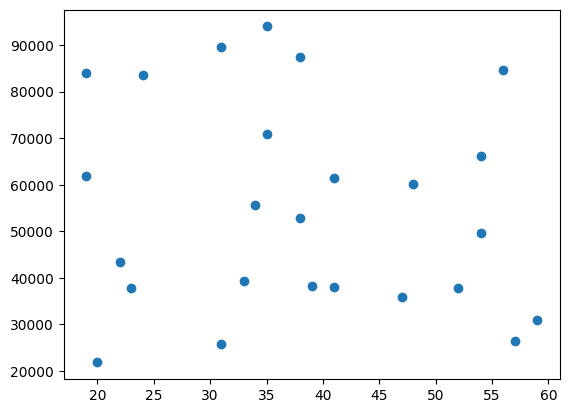

In [5]:
plt.scatter(df["age"], df["income"])

In [10]:
kn=KMeans(n_clusters=3)
kn

KMeans(n_clusters=3)

In [11]:
y_pred=kn.fit_predict(df[["age", "income"]])
y_pred

array([0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       2, 2, 1])

In [12]:
df["cluster"]=y_pred
df.head()


,name,age,income,cluster
0,Person_1,22,43335,0
1,Person_2,59,30870,0
2,Person_3,34,55546,1
3,Person_4,41,61468,1
4,Person_5,19,84063,2


C:\Users\souna\AppData\Local\Temp\ipykernel_22160\3413341843.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


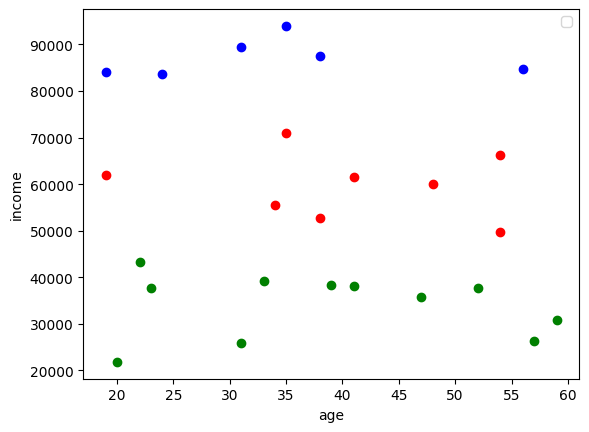

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1.income, color="green")
plt.scatter(df2.age, df2.income, color="red")
plt.scatter(df3.age, df3.income, color="blue")
plt.xlabel("age")
plt.ylabel("income")
plt.legend()

In [21]:
scaler=MinMaxScaler()
scaler.fit(df[["income"]])
df["income"]=scaler.transform(df[["income"]])

scaler.fit(df[["age"]])
df["age"]=scaler.transform(df[["age"]])
df.head()

,name,age,income,cluster
0,Person_1,0.075,0.298034,0
1,Person_2,1.000,0.125211,0
2,Person_3,0.375,0.467335,1
3,Person_4,0.550,0.549441,1
4,Person_5,0.000,0.862712,2


C:\Users\souna\AppData\Local\Temp\ipykernel_22160\2062237455.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


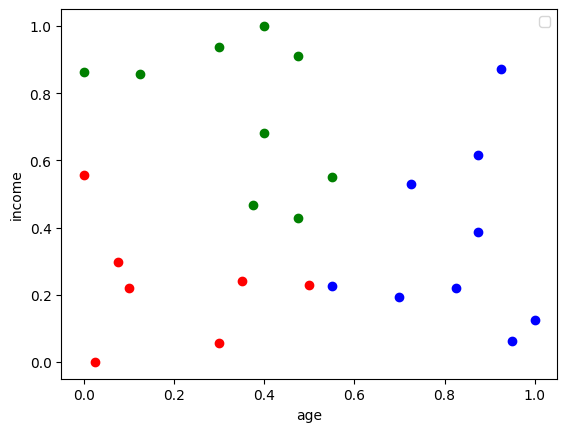

<Figure size 640x480 with 0 Axes>

In [25]:
kn=KMeans(n_clusters=3)
y_pred=kn.fit_predict(df[["age", "income"]])
y_pred

df["cluster"]=y_pred
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1.income, color="green")
plt.scatter(df2.age, df2.income, color="red")
plt.scatter(df3.age, df3.income, color="blue")
plt.xlabel("age")
plt.ylabel("income")
plt.legend()
plt.show()
plt.savefig("cluster.png",dpi=2000)

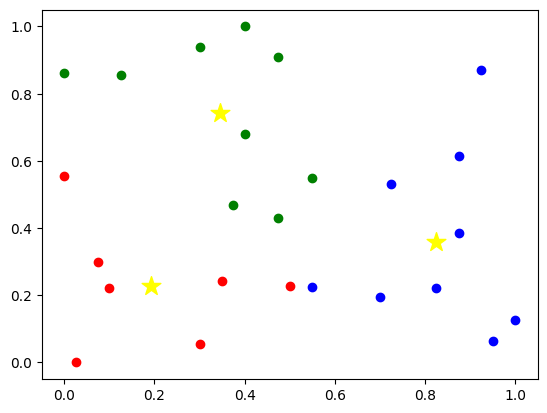

<Figure size 640x480 with 0 Axes>

In [35]:
kn.cluster_centers_
plt.scatter(df1.age, df1.income, color="green")
plt.scatter(df2.age, df2.income, color="red")
plt.scatter(df3.age, df3.income, color="blue")
plt.scatter(kn.cluster_centers_[:,0], kn.cluster_centers_[:,1], color="yellow", marker="*", s=200)


plt.show()

plt.savefig("cluster_centers.png", dpi=2000)

In [31]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["age", "income"]])
    sse.append(km.inertia_)

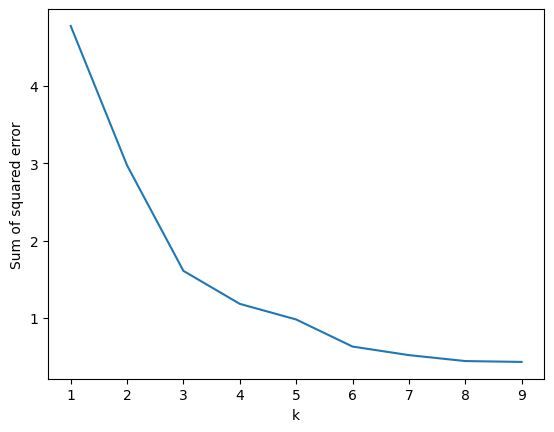

In [36]:
plt.xlabel("k")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)
plt.savefig("elbow.png", dpi=2000)